In [3]:
import tensorflow as tf

In [4]:
base_model=tf.keras.applications.resnet.ResNet101(
         include_top=False,
         weights='imagenet',
         input_shape=(224,224,3)
)

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [5]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

In [6]:
model=Sequential()
model.add(base_model)
model.add(Flatten())

In [7]:
import cv2
import glob
import numpy as np

In [8]:
def get_convfeatures(path):
    img=cv2.imread(path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img=cv2.resize(img,(224,224))
    return model.predict(np.array([img]))

In [9]:
get_convfeatures("/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/10.jpg").shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


(1, 100352)

In [10]:
features=[]
names=[]

In [11]:
for path in glob.glob("/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/*.jpg"):
    features.append(get_convfeatures(path).reshape(-1))
    names.append(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [12]:
features=np.array(features)
names=np.array(names)

In [13]:
input_vector=get_convfeatures("/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/23.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


In [14]:
from scipy import spatial
input_vector = np.squeeze(input_vector)

In [15]:
dist=np.array([spatial.distance.cosine(input_vector,i) for i in features])

In [16]:
min_index=dist.argsort()[:3]

In [17]:
names[min_index]

array(['/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/23.jpg',
       '/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/231.jpg',
       '/kaggle/input/pokemon-images-dataset/pokemon_jpg/pokemon_jpg/326.jpg'],
      dtype='<U81')

In [18]:
import matplotlib.pyplot as plt

In [19]:
def imshow(img):
    fig,ax = plt.subplots(1,1,figsize=(4,4))
    ax.imshow(img)
    plt.show()

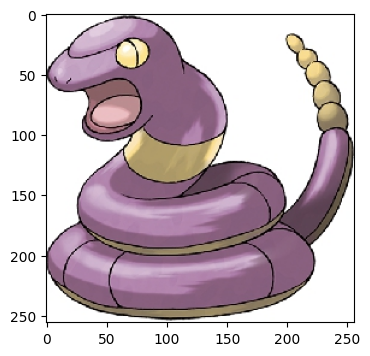

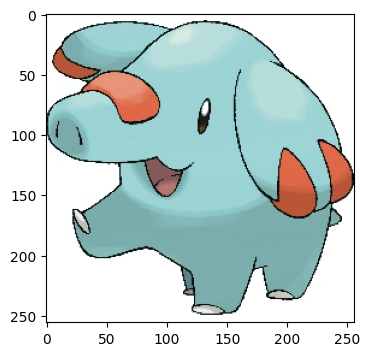

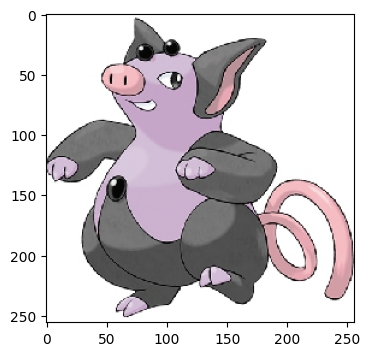

In [20]:
for i in names[min_index]:
    img=cv2.imread(i)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    imshow(img)